#### Error estandar
#### Interpretacion estadistica error estandar
#### Intervalos de confianza

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv ('tmp/Ejemplo_01_Costos_Proyectos.csv')
df.head()

,Costo_Materiales,Costo_Mano_de_Obra,Costo_Total
0,54967.141530,34630.887738,89598.029268
1,48617.356988,39547.083202,88164.440191
2,56476.885381,23007.162131,79484.047512
3,65230.298564,32814.846183,98045.144748
4,47658.466253,26746.787154,74405.253407


In [4]:
# Seleccionar columna de los costos
costos = df['Costo_Total']
print(costos)


0      89598.029268
1      88164.440191
2      79484.047512
3      98045.144748
4      74405.253407
           ...     
495    83983.598972
496    78615.971091
497    81300.827525
498    68387.922517
499    69034.916597
Name: Costo_Total, Length: 500, dtype: float64


In [6]:
# Estadistica basica
# Calcular la media de los costos 
media_costos = np.mean(costos) 
print(f'Media de los costos: {round(media_costos, 2)}')

Media de los costos: 80227.51


### Error estandar

In [7]:
# Calcular desviacion estandar 
desviacion_estandar = np.std(costos)
print(f'La desviacion estandar de los costos es: {round(desviacion_estandar, 2)}')

La desviacion estandar de los costos es: 10616.5


In [10]:
# Calcular el tamaño de mi muestra a traves de la funcion count
n = costos.count()
print(n)
print(type(n))

500
<class 'numpy.int64'>


In [12]:
# Calcular el tamaño de mi muestra a traves de la funcion len
n = len(costos)
print(n)
print(type(n))

500
<class 'int'>


In [16]:
error_estandar = desviacion_estandar/ np.sqrt(n)
print(f'Error estandar {round(error_estandar,2)}')

Error estandar 474.78


In [17]:
# Cual es el costo promedio de los proyectos
print(f'El costo promedio de un proyecto es de ${round(media_costos, 2)}')

# Cual es la variacion en coto de cada proyecto
print(f'Los costos de los proyectos varian alrededor ${round(desviacion_estandar, 2)}')

# Cual es la variabilidad
print(f'La variabilidad de este costo promedio es de ${round(error_estandar, 2)}')

El costo promedio de un proyecto es de $80227.51
Los costos de los proyectos varian alrededor $10616.5
La variabilidad de este costo promedio es de $474.78


### Interpretacion estadistica

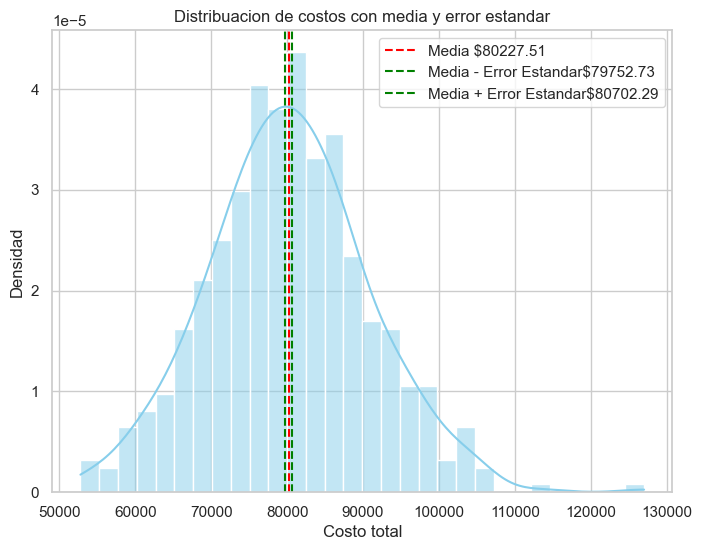

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de una grafica
sns.set (style='whitegrid')

# Crear histograma
plt.figure(figsize=(8, 6))
sns.histplot(costos, kde=True, color='skyblue', stat='density', bins=30)

# Agregar la media
plt.axvline(media_costos, color='red', linestyle='--', label=f'Media ${round(media_costos, 2)}')

# Error estandar pintado
plt.axvline(media_costos - error_estandar, color='green', linestyle='--', label=f'Media - Error Estandar${round(media_costos - error_estandar, 2)}')
plt. axvline(media_costos + error_estandar, color='green', linestyle='--', label=f'Media + Error Estandar${round(media_costos + error_estandar, 2) }')

# Configurar nuestro grafico
plt. title('Distribuacion de costos con media y error estandar')
plt.xlabel('Costo total')
plt.ylabel('Densidad')
plt. legend ()

plt.show()

### Intervalos de confianza

In [24]:
from scipy import stats

In [26]:
confianza = 0.95
intervalo_confianza = stats.t.interval(confianza, n- 1, loc=media_costos, scale=error_estandar)

print(f"Intervalo de confianza al 95% {round(intervalo_confianza[0],2)} a {round(intervalo_confianza[1],2)}")


Intervalo de confianza al 95% 79294.69 a 81160.33
